# Iris Dataset

The dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score
from sklearn .model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load the dataset

iris=datasets.load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)

y=iris.target
df['Species']=y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.dtypes #checking the datatype of each column.

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object

In [4]:
df.isna().sum() #checking whether the dataset contain missing values.

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [5]:
df.describe() #summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


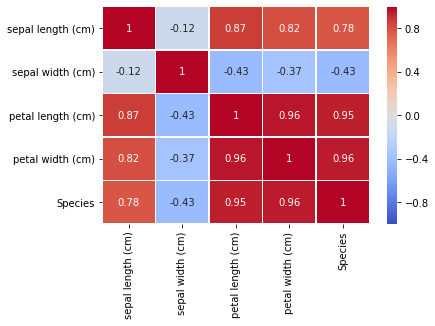

In [6]:
#Compute pairwise correlation of columns

corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=0.5,vmin=-1,vmax=1,cmap="coolwarm") #Plot rectangular data as a color-encoded matrix

# annot: If True, write the data value in each cell.

# linewidths: Width of the lines that will divide each cell.

# vmin, vmax: min and max value of correlation.

#cmap: The mapping from data values to color space.

In [7]:
y=df['Species']
x=df.drop('Species',axis=1)

In [8]:
#splitting the data for training and testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [9]:
# Training the dataset

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [10]:
ypred=clf.predict(x_test) #predicting for the Test data.

In [11]:
# Calculate the accuracy
print("accuracy is: ", round(accuracy_score(y_test, ypred), 2))

accuracy is:  1.0


In [12]:
confusion_matrix(y_test,ypred) 

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [13]:
print(classification_report(y_test,ypred)) # a report showing the main classification metrics.

# Precision - the number of positive class predictions that actually belong to the positive class.

# Recall -    the number of positive class predictions made out of all positive examples in the dataset.

# F1-score -  a single score that balances both the concerns of precision and recall in one number.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



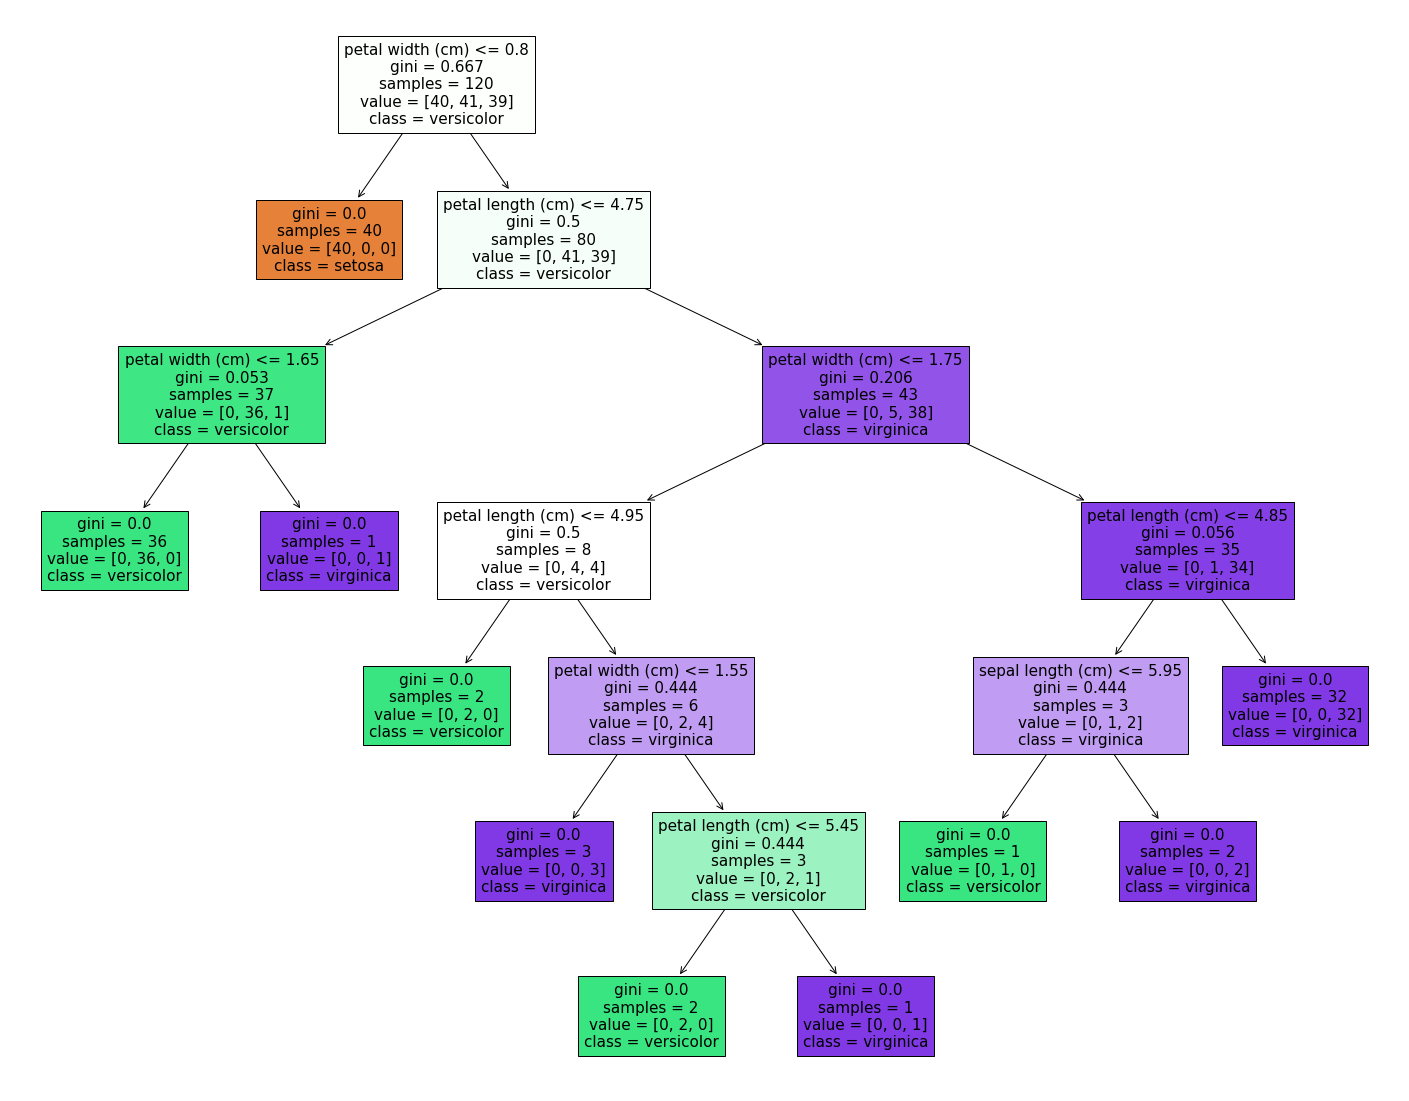

In [14]:
#Visualizing the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
